# Analysis of PbSO4 refinement results
The results from least-squares, bumps-dream, and emcee will be compared and discussed.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

In [9]:
# Read all data
data_least_squares = np.load('refinement_results/least_squares.npy', allow_pickle=True).item()
data_bumps = np.load('refinement_results/bumps_dream_steps5000_burn500_pop1.npy', allow_pickle=True).item()
data_emcee = np.load('refinement_results/emcee_steps5000_walkers15.npy', allow_pickle=True).item()

The obtained parameters and their respective errorbars.     
There is an systematic underestimation in the errorbars from bumps-DREAM, which is related to how the uncertainties of each data-point is modeled, as disucssed [here](https://github.com/bumps/bumps/pull/94).

In [10]:
for name in sorted(data_least_squares.keys()):
    p1 = data_least_squares[name]
    p2 = data_emcee['parameters'][name]
    p3 = data_bumps['parameters'][name]
    print(f'{name:15}: least-squares {p1[0]:9.4f} +- {p1[1]:8.6f} | emcee {p2[0]:9.4f} +- {p2[1]:8.6f} | bumps {p3[0]:9.4f} +- {p3[1]:8.6f}')

intensity      : least-squares  197.1217 +- 1.242605 | emcee  196.8308 +- 1.282312 | bumps  240.4465 +- 0.873294
intensity-1    : least-squares  240.0542 +- 1.605187 | emcee  240.0658 +- 1.510235 | bumps  196.9511 +- 0.650893
length_a       : least-squares    8.4770 +- 0.000271 | emcee    8.4770 +- 0.000259 | bumps    8.4769 +- 0.000151
length_b       : least-squares    5.3958 +- 0.000187 | emcee    5.3957 +- 0.000186 | bumps    5.3957 +- 0.000117
length_c       : least-squares    6.9558 +- 0.000319 | emcee    6.9559 +- 0.000328 | bumps    6.9558 +- 0.000168
resolution_u   : least-squares    0.1948 +- 0.015901 | emcee    0.1947 +- 0.017616 | bumps    0.1938 +- 0.009232
resolution_v   : least-squares   -0.4756 +- 0.030428 | emcee   -0.4747 +- 0.033097 | bumps   -0.4747 +- 0.016805
resolution_w   : least-squares    0.4787 +- 0.012812 | emcee    0.4783 +- 0.013467 | bumps    0.4793 +- 0.006860
scale          : least-squares    1.2105 +- 0.005795 | emcee    1.2087 +- 0.005654 | bumps    1.

## Analysis of posterior distributions obtained by MC simulations

Extract bumps MCMC samples

In [11]:
names = data_bumps['names']

n_parameters = len(data_bumps['names'])
samples_flat = data_bumps['samples'].reshape(-1, n_parameters)

print(data_bumps['samples'].shape)
print(samples_flat.shape)

bumps_samples = dict()
for name in names:
    index = data_bumps['names'].index(name)
    bumps_samples[name] = samples_flat[:, index]

(5011, 10, 10)
(50110, 10)


Extract emcee MCMC samples

In [12]:
n_throw = 1900

n_parameters = len(data_emcee['names'])
samples_flat = data_emcee['samples'][:, n_throw:, :].reshape(-1, n_parameters)

print(data_emcee['samples'].shape)
print(samples_flat.shape)

emcee_samples = dict()
for name in names:
    index = data_emcee['names'].index(name)
    emcee_samples[name] = samples_flat[:, index]

(15, 5000, 11)
(46500, 11)


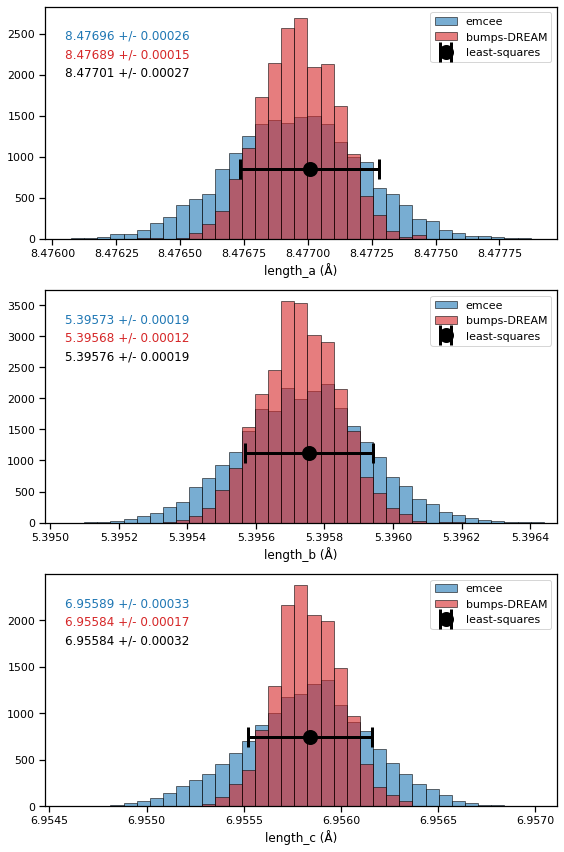

In [13]:
# plot resulting distributions
col1 = 'tab:blue'
col2 = 'tab:red'
col3 = 'k'
names_to_plot = ['length_a', 'length_b', 'length_c']


fig, axes = plt.subplots(3, 1, figsize=(8, 12))
hist_kwargs = dict(lw=0.9, edgecolor='black', alpha=0.6, density=True)
for name, ax in zip(names_to_plot, axes):
    
    # hists
    val1, err1 = data_emcee['parameters'][name]
    val2, err2 = data_bumps['parameters'][name]
    
    xlim = [min(emcee_samples[name]), max(emcee_samples[name])]
    bins = np.linspace(*xlim, 40)
    ax.hist(emcee_samples[name], bins=bins, **hist_kwargs, label='emcee', color=col1)
    ax.hist(bumps_samples[name], bins=bins, **hist_kwargs, label='bumps-DREAM', color=col2)
    
    # least-squares
    ylim = ax.get_ylim()
    val3, err3 = data_least_squares[name]
    ax.errorbar(val3, y=ylim[1]*0.3, xerr=err3, fmt='o', ms=12, capsize=10, lw=3, markeredgewidth=3, label='least-squares', color=col3)
    
    ax.set_xlim(xlim)
    
    # texts
    ax.text(0.04, 0.86, f'{val1:.5f} +/- {err1:.5f}', color=col1, transform=ax.transAxes)
    ax.text(0.04, 0.78, f'{val2:.5f} +/- {err2:.5f}', color=col2, transform=ax.transAxes)
    ax.text(0.04, 0.7, f'{val3:.5f} +/- {err3:.5f}', color=col3, transform=ax.transAxes)
    
    ax.legend(loc=1)
    ax.set_xlabel(name + ' (Å)')
    
fig.tight_layout()